### 1. Preparing The Datset

In [3]:
#Loading The Dataset

import pandas as pd
import numpy as np
df = pd.read_csv("car_sales_data.csv")

#Inspecting the Dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_ID        200 non-null    int64  
 1   Brand         199 non-null    object 
 2   Model         199 non-null    object 
 3   Year          200 non-null    int64  
 4   Fuel_Type     199 non-null    object 
 5   Transmission  199 non-null    object 
 6   Engine_Size   200 non-null    float64
 7   Price         200 non-null    object 
 8   KM_Driven     199 non-null    float64
 9   Owner_Type    198 non-null    object 
 10  Color         199 non-null    object 
 11  Seller_Type   199 non-null    object 
 12  Location      200 non-null    object 
 13  Sold          200 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 22.0+ KB


,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Engine_Size,Price,KM_Driven,Owner_Type,Color,Seller_Type,Location,Sold
0,1,Toyota,Innova,2018,Diesel,Automatic,2.9,760749,42867.0,First,White,Individual,Delhi,No
1,2,Toyota,Innova,2016,Petrol123,Manual,1.6,1259500,32742.0,Third,Grey,Individual,Mumbai,Yes
2,3,Hyundai,Verna,2018,Diesel,Manual,1.2,492678,62115.0,First,Blue,Individual,Delhi,Yes
3,4,Toyota,Innova,2016,Petrol,Manual,1.8,1859845,22922.0,Third,White,Dealer,Kolkata,Yes
4,5,Mahindra,Bolero,2018,Petrol,Automatic,2.1,1580814,23622.0,First,Silver,Individual,Hyderabad,No


In [4]:
#Checking For Missing Value

df.isnull().sum()

Car_ID          0
Brand           1
Model           1
Year            0
Fuel_Type       1
Transmission    1
Engine_Size     0
Price           0
KM_Driven       1
Owner_Type      2
Color           1
Seller_Type     1
Location        0
Sold            0
dtype: int64

In [5]:
#Cleaning the Price Column 
df["Price"] = df["Price"].astype(str).str.replace(',', '')
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["Price"].describe()

count    1.990000e+02
mean     1.167282e+06
std      5.278976e+05
min      3.018050e+05
25%      7.134000e+05
50%      1.126300e+06
75%      1.639546e+06
max      1.994698e+06
Name: Price, dtype: float64

In [6]:
#Handling The Missing Value
df.fillna({'Brand': 'Unknown', 'Model': 'Unknown', 'Fuel_Type': 'Unknown', 'Seller_Type': 'Unknown'}, inplace=True)
df.fillna({'KM_Driven': df['KM_Driven'].median()}, inplace=True)
df['Owner_Type'] = df['Owner_Type'].fillna(df['Owner_Type'].mode()[0])


In [7]:
# Convert Sold Column to Binary (0/1)
df['Sold'] = df['Sold'].map({'No': 0, 'Yes': 1})

### 2. Exploratory Data Analysis

In [8]:
# Filter rows where the car is sold
sold_df = df[df['Sold'] == 1]

In [9]:
# Count how many times each brand appears
brand_counts = sold_df['Brand'].value_counts()
print(brand_counts)

Brand
Honda         18
Kia           13
Ford          13
Maruti        13
Hyundai       12
Toyota        11
Mahindra      10
Volkswagen     9
Name: count, dtype: int64


#### A. Which car brands are sold most frequently?

C:\Users\anime\AppData\Local\Temp\ipykernel_20656\4048054968.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')


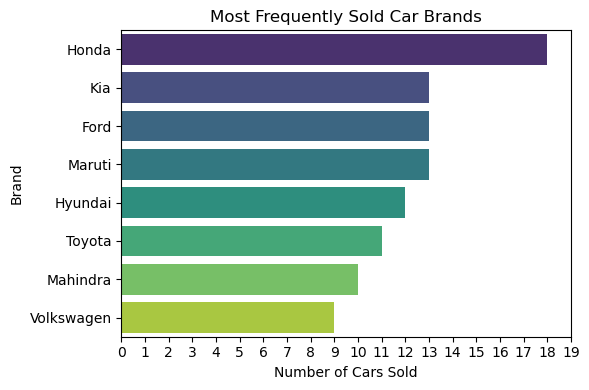

In [27]:
# Plotting the result Using Bar Plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
ax = sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.title("Most Frequently Sold Car Brands")
plt.xlabel("Number of Cars Sold")
plt.ylabel("Brand")

# Fix: Set x-axis to show only integer ticks
max_val = brand_counts.values.max()
plt.xticks(ticks=range(0, max_val + 2))  # +2 to give some margin

plt.tight_layout()
plt.show()


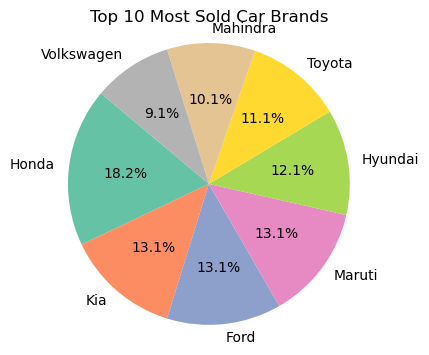

In [26]:
# Pie Chart of Top 10 Brands Sold
top10 = brand_counts.head(10)
plt.figure(figsize=(4,4))
plt.pie(
    top10,
    labels=top10.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2", n_colors=10)
)

plt.title("Top 10 Most Sold Car Brands")
plt.axis('equal')
plt.show()



#### B. How does the price vary with the number of kilometers driven?

In [12]:
# Checking Distribution
print(df['Price'].describe())
print(df['KM_Driven'].describe())

count    1.990000e+02
mean     1.167282e+06
std      5.278976e+05
min      3.018050e+05
25%      7.134000e+05
50%      1.126300e+06
75%      1.639546e+06
max      1.994698e+06
Name: Price, dtype: float64
count      200.000000
mean     53392.450000
std      25845.693287
min      10009.000000
25%      31172.000000
50%      54656.000000
75%      74110.500000
max      99254.000000
Name: KM_Driven, dtype: float64


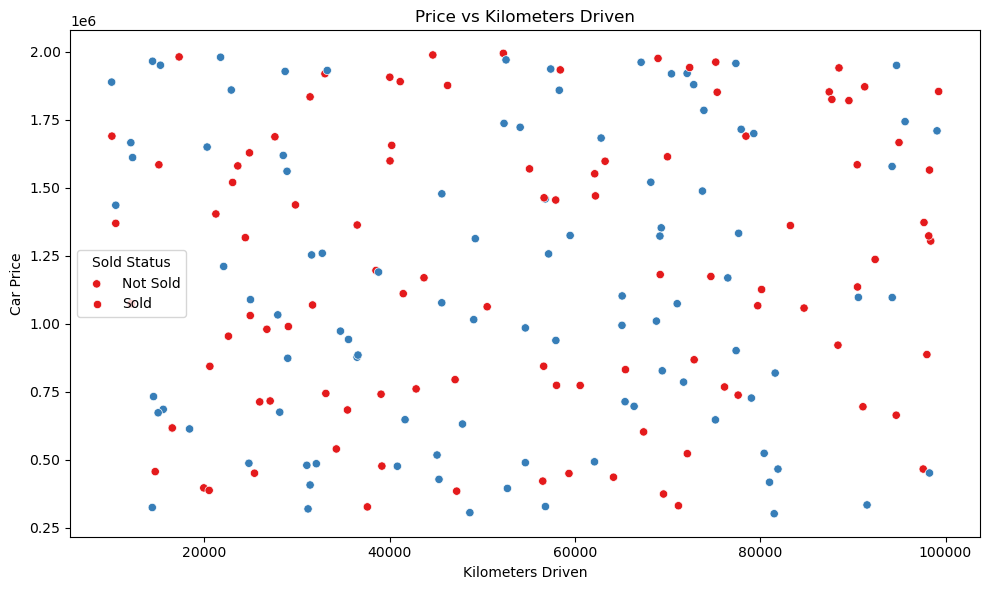

In [13]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='KM_Driven', y='Price', data=df, hue='Sold', palette='Set1')
plt.title("Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Car Price")
plt.legend(title='Sold Status', labels=['Not Sold', 'Sold'])
plt.tight_layout()
plt.show()


C:\Users\anime\AppData\Local\Temp\ipykernel_20656\3714382494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KM_Range', y='Price', data=df, palette='coolwarm')


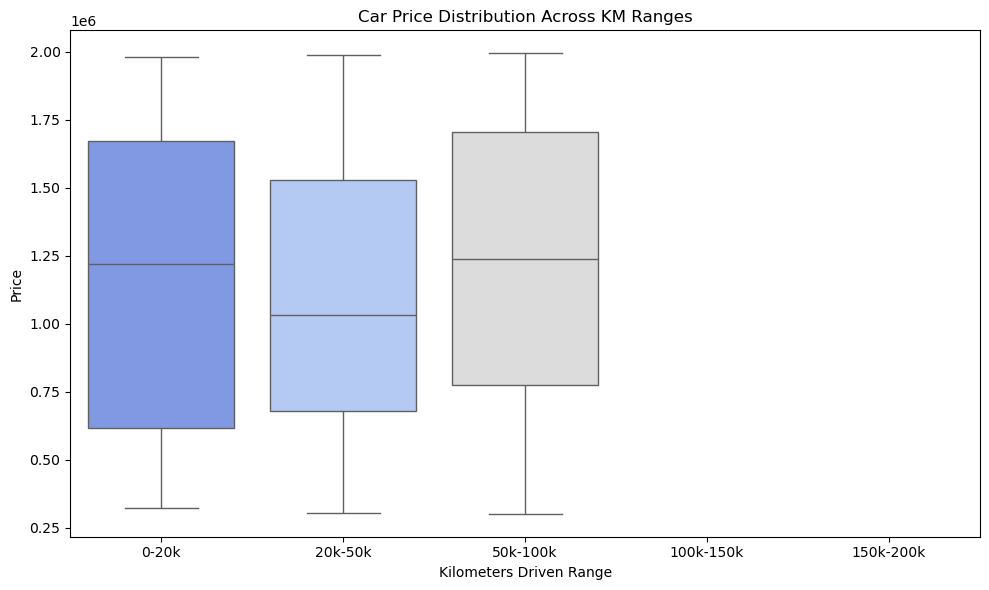

In [28]:
df['KM_Range'] = pd.cut(df['KM_Driven'], bins=[0, 20000, 50000, 100000, 150000, 200000], 
                        labels=['0-20k', '20k-50k', '50k-100k', '100k-150k', '150k-200k'])

plt.figure(figsize=(10,6))
sns.boxplot(x='KM_Range', y='Price', data=df, palette='coolwarm')
plt.title("Car Price Distribution Across KM Ranges")
plt.xlabel("Kilometers Driven Range")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


#### C. Classification "Predict whether a used car will be sold based on its features such as brand, model, year, fuel type, price, kilometers driven, and seller type."

In [14]:
# Selecting Features and Target
X = df[['Brand', 'Model', 'Year', 'Fuel_Type', 'Price', 'KM_Driven', 'Seller_Type']]
y = df['Sold']
df['Log_KM'] = np.log1p(df['KM_Driven'])  # Smooths skewed data
df['Car_Age'] = 2025 - df['Year']


In [15]:
# Encode Categorical Variables 
X = pd.get_dummies(X, drop_first=True)
brand_freq = df['Brand'].value_counts().to_dict()
df['Brand_freq'] = df['Brand'].map(brand_freq)


In [16]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1.0, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    "Decision Tree": {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski']
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    }
}


In [20]:
# Fill missing values with median (recommended for numeric features)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

from sklearn.metrics import accuracy_score, classification_report
tuned_results = {}

for name, model in models.items():
    print(f"🔧 Tuning {name}...")
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grids[name],
                        cv=5,
                        n_jobs=-1,
                        verbose=0)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    tuned_results[name] = {
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Sold)": report['1']['precision'],
        "Recall (Sold)": report['1']['recall'],
        "F1-Score (Sold)": report['1']['f1-score']
    }


🔧 Tuning Random Forest...
🔧 Tuning Logistic Regression...
🔧 Tuning Decision Tree...
🔧 Tuning KNN...
🔧 Tuning Gradient Boosting...
🔧 Tuning XGBoost...


c:\Users\anime\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
pd.DataFrame(tuned_results).T.sort_values(by="Accuracy", ascending=False)

,Best Params,Accuracy,Precision (Sold),Recall (Sold),F1-Score (Sold)
Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.625,0.6875,0.52381,0.594595
Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.525,0.571429,0.380952,0.457143
XGBoost,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.5,0.526316,0.47619,0.5
Decision Tree,"{'max_depth': 10, 'min_samples_split': 2}",0.475,0.5,0.47619,0.487805
KNN,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.45,0.470588,0.380952,0.421053
Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.425,0.444444,0.380952,0.410256


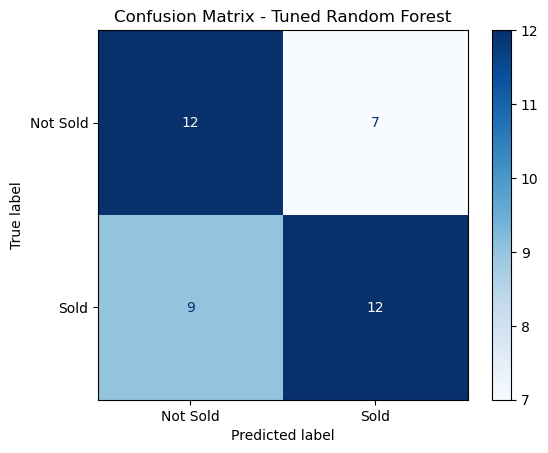

In [24]:
# Confusion Matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🔁 Train the best model
best_rf = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)

# 📊 Make predictions
y_pred_rf = best_rf.predict(X_test)

# 🧮 Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# 📈 Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Sold", "Sold"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.grid(False)
plt.show()
